In [15]:
import pandas as pd
data = pd.read_csv('../data_acquisition/clean_data_check2.csv', index_col=0)
# print(data.columns)
data = data.rename(columns={'number of leakage': 'number_of_leakage'})
data = data[(data.number_of_leakage == 1)]
# data= data.dropna()
data = data.drop(columns=['x2','y2','Comments', 'Day', 'number_of_leakage', 'quality'])
y = data[['x1', 'y1']]
X = data.drop(['x1', 'y1'], axis=1)
print(X.columns)

Index(['MFC6', 'MFC7', 'MFC8', 'MFC9', 'MFC10', 'MFC1', 'MFC2', 'MFC3', 'MFC4',
       'MFC5', 'total flow rate', 'mfc6_residual', 'mfc7_residual',
       'mfc8_residual', 'mfc9_residual', 'mfc10_residual', 'mfc1_residual',
       'mfc2_residual', 'mfc3_residual', 'mfc4_residual', 'mfc5_residual',
       'tot_residual_flow'],
      dtype='object')


In [10]:
data.head()

,x1,y1,MFC6,MFC7,MFC8,MFC9,MFC10,MFC1,MFC2,MFC3,...,mfc7_residual,mfc8_residual,mfc9_residual,mfc10_residual,mfc1_residual,mfc2_residual,mfc3_residual,mfc4_residual,mfc5_residual,tot_residual_flow
sample_number,,,,,,,,,,,,,,,,,,,,,
0.0,11930,3100,0.0000,0.0169,0.0350,0.0995,0.0812,0.0000,0.0129,0.0306,...,0.0,0.0,0.0,0.0255,0.0,0.0,0.0,0.0,0.0,0.0255
2.0,930,100,0.0549,0.0412,0.0213,0.0124,0.0292,0.1815,0.0516,0.0213,...,0.0,0.0,0.0,0.0255,0.0,0.0,0.0,0.0,0.0,0.0255
8.0,9180,4600,0.0235,0.0437,0.1338,0.0626,0.0442,0.0223,0.0292,0.0363,...,0.0,0.0,0.0,0.0255,0.0,0.0,0.0,0.0,0.0,0.0255
10.0,6180,1600,0.0351,0.0517,0.0381,0.0213,0.0331,0.0425,0.0892,0.0548,...,0.0,0.0,0.0,0.0255,0.0,0.0,0.0,0.0,0.0,0.0255
14.0,9680,350,0.0108,0.0204,0.0255,0.0275,0.0403,0.0094,0.0214,0.0795,...,0.0,0.0,0.0,0.0255,0.0,0.0,0.0,0.0,0.0,0.0255


In [11]:
data.isna().sum()

x1                   0
y1                   0
MFC6                 0
MFC7                 0
MFC8                 0
MFC9                 0
MFC10                0
MFC1                 0
MFC2                 0
MFC3                 0
MFC4                 0
MFC5                 0
total flow rate      0
mfc6_residual        0
mfc7_residual        0
mfc8_residual        0
mfc9_residual        0
mfc10_residual       0
mfc1_residual        0
mfc2_residual        0
mfc3_residual        0
mfc4_residual        0
mfc5_residual        0
tot_residual_flow    0
dtype: int64

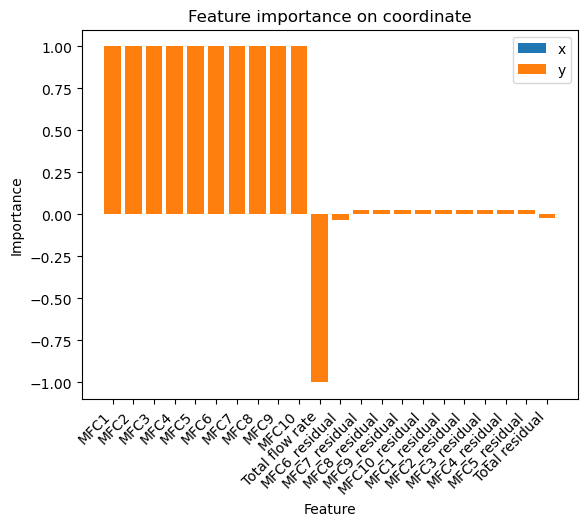

In [33]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import numpy as np
# define dataset
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
importance_x = importance[0]/max(importance[0])
importance_y = importance[1]/max(importance[1])
x_labels = ['MFC1', 'MFC2', 'MFC3', 'MFC4', 'MFC5', 'MFC6', 'MFC7', 'MFC8', 'MFC9',
       'MFC10', 'Total flow rate', 'MFC6_residual', 'MFC7_residual',
       'MFC8_residual', 'MFC9_residual', 'MFC10_residual', 'MFC1_residual',
       'MFC2_residual', 'MFC3_residual', 'MFC4_residual', 'MFC5_residual',
       'Total residual']
# summarize feature importance
# for i,v in enumerate(importance):
#  print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
X_axis = np.arange(len(x_labels))
pyplot.bar([x for x in range(len(importance_x))], importance_x, label = 'x')
pyplot.bar([x for x in range(len(importance_y))], importance_y, label = 'y')
pyplot.title('Feature importance on coordinate')
# pyplot.xticks([x for x in range(len(importance_x))], x_labels)
pyplot.xticks([x for x in range(len(importance_x))], x_labels, rotation=45, ha='right')
pyplot.xlabel('Features')
pyplot.ylabel('Importance')
pyplot.legend()
pyplot.show()

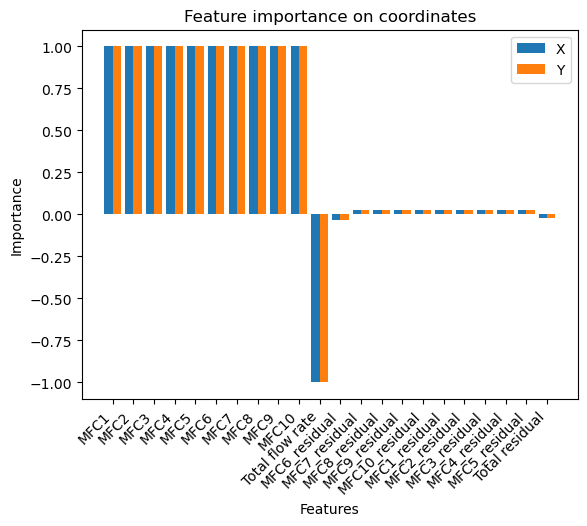

In [38]:

import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['MFC1', 'MFC2', 'MFC3', 'MFC4', 'MFC5', 'MFC6', 'MFC7', 'MFC8', 'MFC9',
       'MFC10', 'Total flow rate', 'MFC6_residual', 'MFC7_residual',
       'MFC8_residual', 'MFC9_residual', 'MFC10_residual', 'MFC1_residual',
       'MFC2_residual', 'MFC3_residual', 'MFC4_residual', 'MFC5_residual',
       'Total residual']
Ygirls = importance_x.tolist()
Zboys = importance_y.tolist()
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'X')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Y')
  
# plt.xticks(X_axis, X)

pyplot.xticks([x for x in range(len(importance_x))], x_labels, rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel("Importance")
plt.title("Feature importance on coordinates")
plt.legend()
plt.show()